<a href="https://colab.research.google.com/github/ShreejalBhattarai/Learning_MachineLearning/blob/main/flags_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torch.optim as optim
import torch.nn.functional as F

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kaggle_api.json to kaggle_api.json


In [5]:
import os

# Make the directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move and rename the file to what Kaggle expects
!mv kaggle_api.json /root/.kaggle/kaggle.json

# Set correct permissions
!chmod 600 /root/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d shuvokumarbasak4004/world-flags-dataset-195


Dataset URL: https://www.kaggle.com/datasets/shuvokumarbasak4004/world-flags-dataset-195
License(s): MIT
 98% 443M/454M [00:06<00:00, 79.0MB/s]
100% 454M/454M [00:06<00:00, 78.4MB/s]


In [18]:
!ls -l /content


total 465080
drwxr-xr-x 1 root root      4096 Jun 26 13:35 sample_data
-rw-r--r-- 1 root root 476230612 Jun  2  2024 world-flags-dataset-195.zip


In [19]:
!unzip -q world-flags-dataset-195.zip -d /content/flags


In [21]:
!ls /content/flags/data


 Afghanistan		   Ghana	       Oman
 Albania		   Greece	       Pakistan
 Algeria		   Grenada	       Palau
 Andorra		   Guatemala	       Panama
 Angola			   Guinea	      'Papua New Guinea'
'Antigua and Barbuda'	   Guinea-Bissau       Paraguay
 Argentina		   Guyana	       Peru
 Armenia		   Haiti	       Philippines
 Australia		  'Holy See'	       Poland
 Austria		   Honduras	       Portugal
 Azerbaijan		   Hungary	       Qatar
 Bahamas		   Iceland	       Romania
 Bahrain		   India	       Russia
 Bangladesh		   Indonesia	       Rwanda
 Barbados		   Iran		      'Saint Kitts and Nevis'
 Belarus		   Iraq		      'Saint Lucia'
 Belgium		   Ireland	       Samoa
 Belize			   Israel	      'San Marino'
 Benin			   Italy	      'Sao Tome and Principe'
 Bhutan			  'Ivory Coast'       'Saudi Arabia'
 Bolivia		   Jamaica	       Senegal
'Bosnia and Herzegovina'   Japan	       Serbia
 Botswana		   Jordan	       Seychelles
 Brazil			   Kazakhstan	      'Sierra Leone'
 Brunei			   Kenya	       Singapore
 Bul

In [23]:
from torchvision import datasets, transforms

dataset_path = '/content/flags/data'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
print(dataset.classes)


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'CAR', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'DPRK', 'DRC', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 

In [24]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [25]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [26]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


Using device: cuda


In [27]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 32, 128),  # assuming input images are 128x128
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# Instantiate and move to device:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=len(dataset.classes))
model = model.to(device)



In [28]:
model = SimpleCNN(num_classes=len(dataset.classes))
model = model.to(device)


In [29]:
import torch.optim as optim
import torch.nn.functional as F

optimizer = optim.Adam(model.parameters(), lr=0.001)


I stopped the training because it converged in the third iteration itself.


In [30]:
for epoch in range(10):
    model.train()
    total_loss = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.0734
Epoch 2, Loss: 0.0047
Epoch 3, Loss: 0.0000


KeyboardInterrupt: 

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Get some images and labels from val_loader
dataiter = iter(val_loader)
images, labels = next(dataiter)

# Move images to device
images = images.to(device)


In [34]:
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)


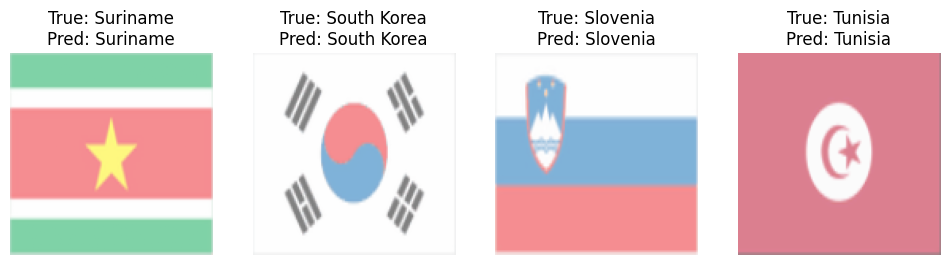

In [44]:
# Move images and labels back to CPU for plotting
images = images.cpu()
labels = labels.cpu()
preds = preds.cpu()

# Define a helper function to show images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # CxHxW to HxWxC
    img = img * 0.5 + 0.5  # unnormalize if you normalized your data
    plt.imshow(img)
    plt.axis('off')

# Plot a few images with their predicted and true labels
plt.figure(figsize=(12, 6))
for idx in range(min(4, len(images))):
    plt.subplot(2, 4, idx+1)
    imshow(images[idx])
    plt.title(f'True: {dataset.classes[labels[idx]]}\nPred: {dataset.classes[preds[idx]]}')
plt.show()


In [40]:
from google.colab import files
uploaded = files.upload()  # Upload your image file


Saving nepal_flag.jpg to nepal_flag.jpg


In [41]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Define the same transforms as your training data
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load the uploaded image (replace 'your_image.jpg' with the uploaded filename)
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert('RGB')  # convert to 3 channels if needed

# Apply transforms and add batch dimension
input_tensor = transform(image).unsqueeze(0)  # shape: [1, 3, 128, 128]

# Move to device
input_tensor = input_tensor.to(device)


In [42]:
model.eval()
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)

predicted_class = dataset.classes[predicted.item()]
print(f'Predicted class: {predicted_class}')


Predicted class: Nepal
